In [214]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd

# Sklearn Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph
from tabulate import tabulate

# Custom Module's

from wrangle import wrangle_zillow_modeling, wrangle_zillow_exploration, wrangle_zillow_second_modeling
import explore

#import evaluate
import warnings
warnings.filterwarnings("ignore")
from env import host, user, password

# Project Planning

- Understand the project goals
    - What is my Target?
    - What will I use my target for?
    - What are my deliverables?
    - What platform am I going to use for slide deck?

> - Acquire the data from codeup database
    - Grab first iteration of features
        - use only square feet of the home
        - number of bedrooms
        - number of bathrooms
        - taxvaluedollarcnt
    - Grab second iteration of features
        - select all features

> - Prepare the data
    - Clean
        - Drop or Impute nulls
        - Change datatypes
        - remove duplicate or unuseful features
        - scale
        - split
    - Create functions that can making modeling/exploration easy.  
        - prepare_first_exploration(), 
        - prepare_first_modeling()
        - prepare_second_exploration()
        - prepare_second_modeling()

> - Data Exploration
    - state original hyposesis
    - lay out some questions to answer
    - Feature engineer 
    - univerate, bivariate, multivariate
    - t test / chi2 test
    - heat maps
    
> - Modeling
    - Run one of each regression models
    - change a few hyperparameters
    - Store type of test and hyerparameters used in a DB
    - find best model with lowest RMSE
    - best model on test

> - Conclusion and Recommendations
    - Take aways, recommendation and if I had more time
    - Work on excuetive summary
    - Create slides
___

### Project and Goals

> - The project and goal is to predict the values of single unit properties that the tax district assesses using the property data from those with a transaction during the "hot months" (in terms of real estate demand) of May-August, 2017.<br>
> - Find the distribution of tax rates for each county.

### Starting Hypotheses

<p style="font-family:courier; font-size:150%;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Area of a house is the only important feature of estimating a houses tax value.  The big idea here is that as size increases so does rooms and bathrooms, therefore, if a house is bigger then it will be more expensive and have a higher tax value.</p>

# Executive Summary - Conclusions & Next Steps

### Conclusion

<p style="font-family:courier; font-size:150%;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;My tweedie regressor model's Root Mean Squared Error (RMSE) was \$219,817.  This beat my baseline RMSE of \$250,611 by roughly \$31,000.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Tax value can be predicted off of area, bedrooms, and bathrooms with a tweedie regressor regression model<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If I had more time, I would have liked to explore and model the many different features of the Zillow database.  I would have also liked to learn more about the domain knowledge of real estate.<br><br></p>

# Data Acquisition

### First Iteration

In [3]:
df = first_zillow_data()

### .info(), .head(), .shape, .describe()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28124 entries, 0 to 28123
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       28077 non-null  float64
 1   bedrooms   28124 non-null  float64
 2   bathrooms  28124 non-null  float64
 3   tax_value  28123 non-null  float64
dtypes: float64(4)
memory usage: 879.0 KB


In [9]:
df.head()

,area,bedrooms,bathrooms,tax_value
0,1316.0,3.0,2.0,205123.0
1,1458.0,3.0,2.0,136104.0
2,1421.0,2.0,1.0,35606.0
3,2541.0,4.0,3.0,880456.0
4,1491.0,3.0,2.0,107110.0


In [6]:
df.shape

(28124, 4)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,28077.0,1934.930014,995.684457,240.0,1278.0,1675.0,2326.0,17245.0
bedrooms,28124.0,3.309487,0.943073,0.0,3.0,3.0,4.0,12.0
bathrooms,28124.0,2.316509,1.016983,0.0,2.0,2.0,3.0,11.0
tax_value,28123.0,535004.915763,707681.057984,1000.0,198636.0,382798.0,632767.0,23858374.0


### Distributions

<AxesSubplot:>

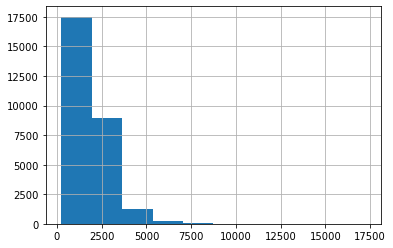

In [10]:
df.area.hist()

<AxesSubplot:>

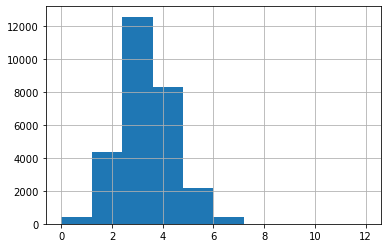

In [11]:
df.bedrooms.hist()

<AxesSubplot:>

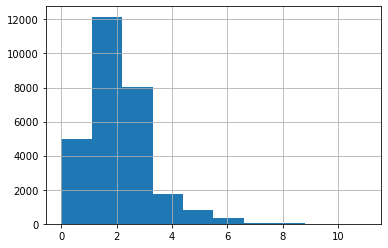

In [12]:
df.bathrooms.hist()

<AxesSubplot:>

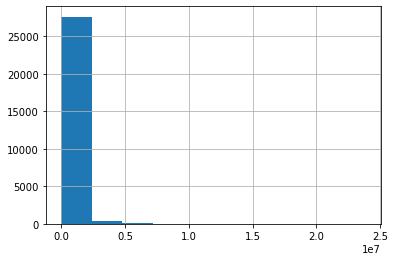

In [13]:
df.tax_value.hist()

### Target Feature - "tax_value"

In [26]:
 df.tax_value.min(), df.tax_value.max()

(1000.0, 23858374.0)

In [32]:
df.tax_value.value_counts(bins=[0, 1000000, 2000000, 3000000, 4000000])

(-0.001, 1000000.0]       25162
(1000000.0, 2000000.0]     2207
(2000000.0, 3000000.0]      453
(3000000.0, 4000000.0]      139
Name: tax_value, dtype: int64

<AxesSubplot:>

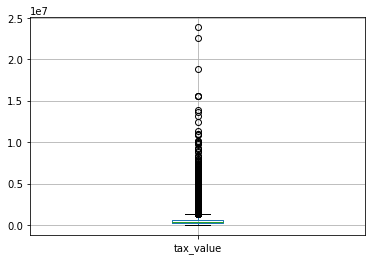

In [31]:
df.boxplot(column=["tax_value"])

### Data Dictionary

# Exploration

In [250]:
train, validate, test = wrangle_zillow_exploration()

In [251]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13734 entries, 23415 to 7678
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       13734 non-null  float64
 1   bedrooms   13734 non-null  float64
 2   bathrooms  13734 non-null  float64
 3   tax_value  13734 non-null  float64
dtypes: float64(4)
memory usage: 536.5 KB


In [252]:
train.head()

,area,bedrooms,bathrooms,tax_value
23415,1139.0,3.0,2.0,400834.0
27422,1666.0,3.0,2.0,530710.0
22548,1608.0,3.0,2.0,103502.0
21163,2565.0,4.0,3.0,394909.0
3347,2271.0,4.0,2.0,1009645.0


### Hypothesis Testing

- $H_o$: area and bedrooms are not linearly correlated
- $H_a$: area and bedrooms are linearly correlated

In [253]:
corr, p = stats.pearsonr(train.area, train.bedrooms)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    
corr, p

We reject the null hypothesis


(0.6045569972039755, 0.0)

- $H_o$: area and restrooms are not linearly correlated
- $H_a$: area and restrooms are linearly correlated

In [255]:
corr, p = stats.pearsonr(train.area, train.bathrooms)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    
corr, p

We reject the null hypothesis


(0.7810457190519444, 0.0)

### Heatmap

In [161]:
cols = list(train.columns)

In [162]:
def corr_heatmap(train): 
# Make a heatmap that shows correlation of churn and other variables
    plt.figure(figsize=(8, 12))
    heatmap = sns.heatmap(train.drop(columns=['tax_rate']).corr()[['tax_value']].sort_values(by='tax_value', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')
    heatmap.set_title('Features Correlating with Tax Value', fontdict={'fontsize':18}, pad=16);

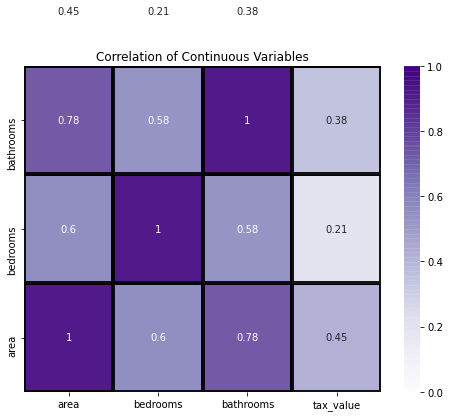

In [163]:
explore.create_heatmap(train, cols, descriptive=None)

In [164]:
#explore.plot_variable_pairs(train, cols, descriptive=None, hue=None)

In [165]:
#sns.pairplot(train)

    This showed me nothing, lets create some catagorical values

In [166]:
train['median_area'] = np.where(train.area > train.area.median(), 'larger', 'smaller')

In [167]:
train['median_bed'] = np.where(train.bedrooms > train.bedrooms.median(), 'larger', 'smaller')

In [168]:
train['median_bathrooms'] = np.where(train.bathrooms > train.bathrooms.median(), 'larger', 'smaller')

In [169]:
categorical_vars = ['median_area', 'median_bed', 'median_bathrooms']
continuous_vars = ['tax_value']

<AxesSubplot:xlabel='tax_value', ylabel='Count'>

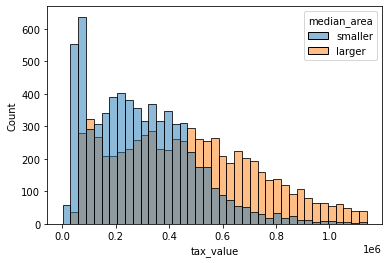

In [171]:
sns.histplot(data=train, x='tax_value', hue='median_area')

Text(0, 0.5, 'Tax Value')

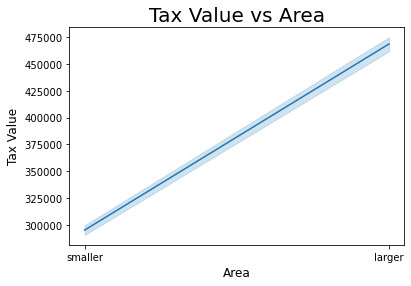

In [191]:
graph = sns.lineplot(x='median_area', y='tax_value', data=train)
graph.set_title('Tax Value vs Area', fontsize=20)
graph.set_xlabel("Area", fontsize=12)
graph.set_ylabel("Tax Value", fontsize=12)

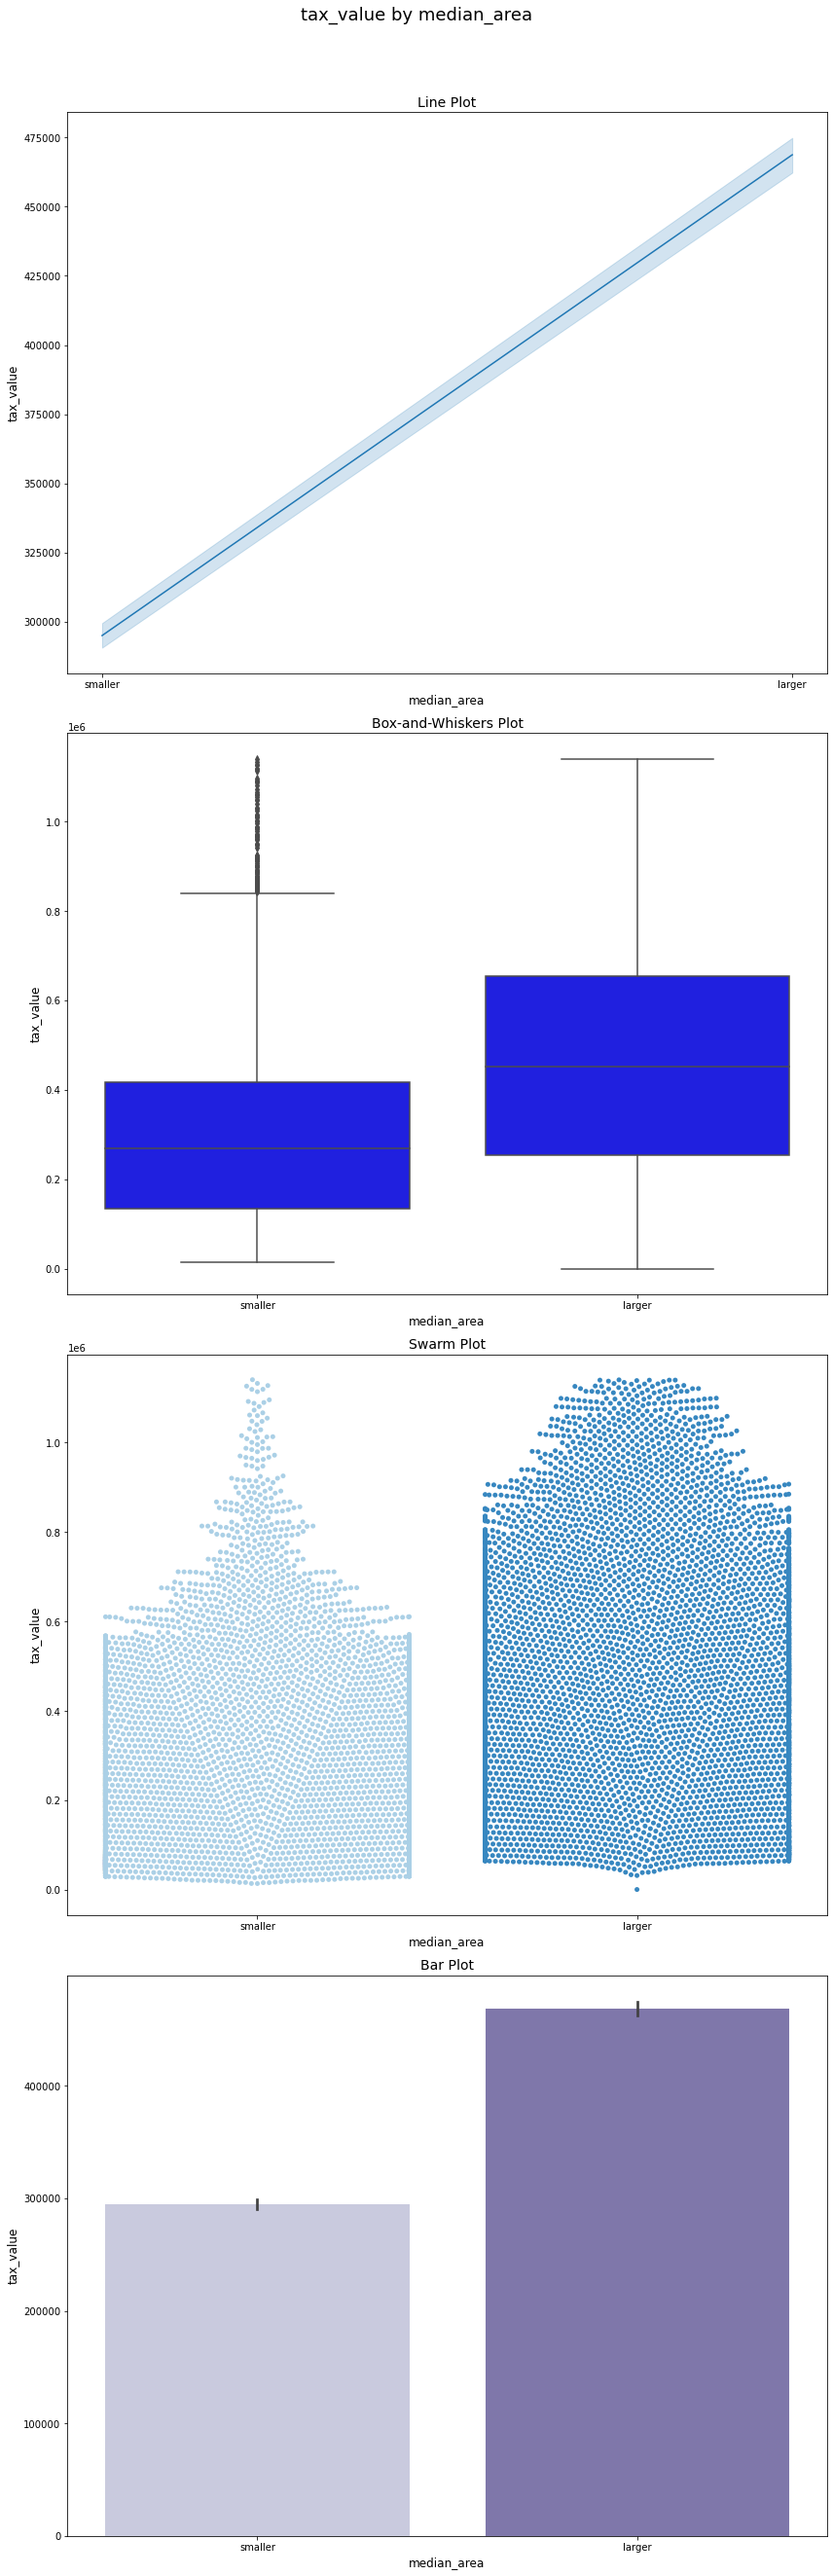

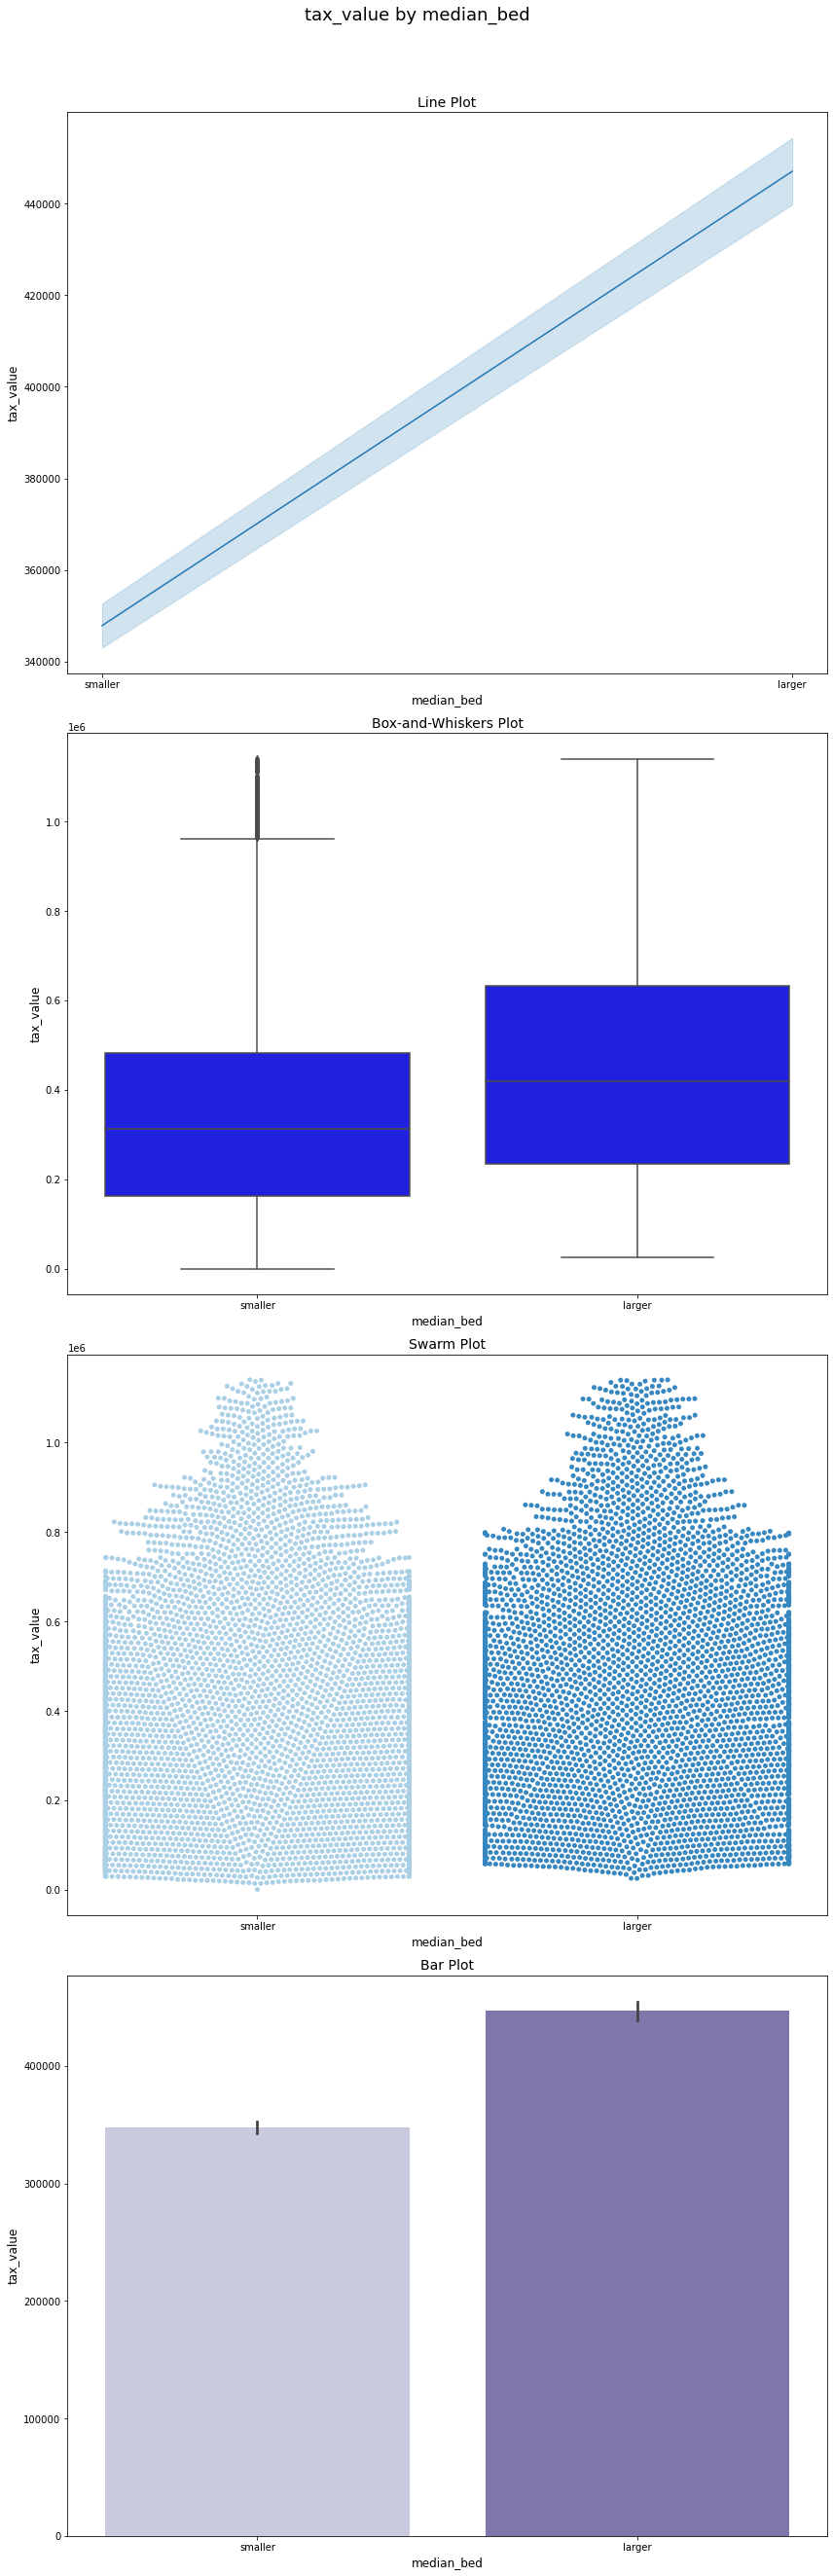

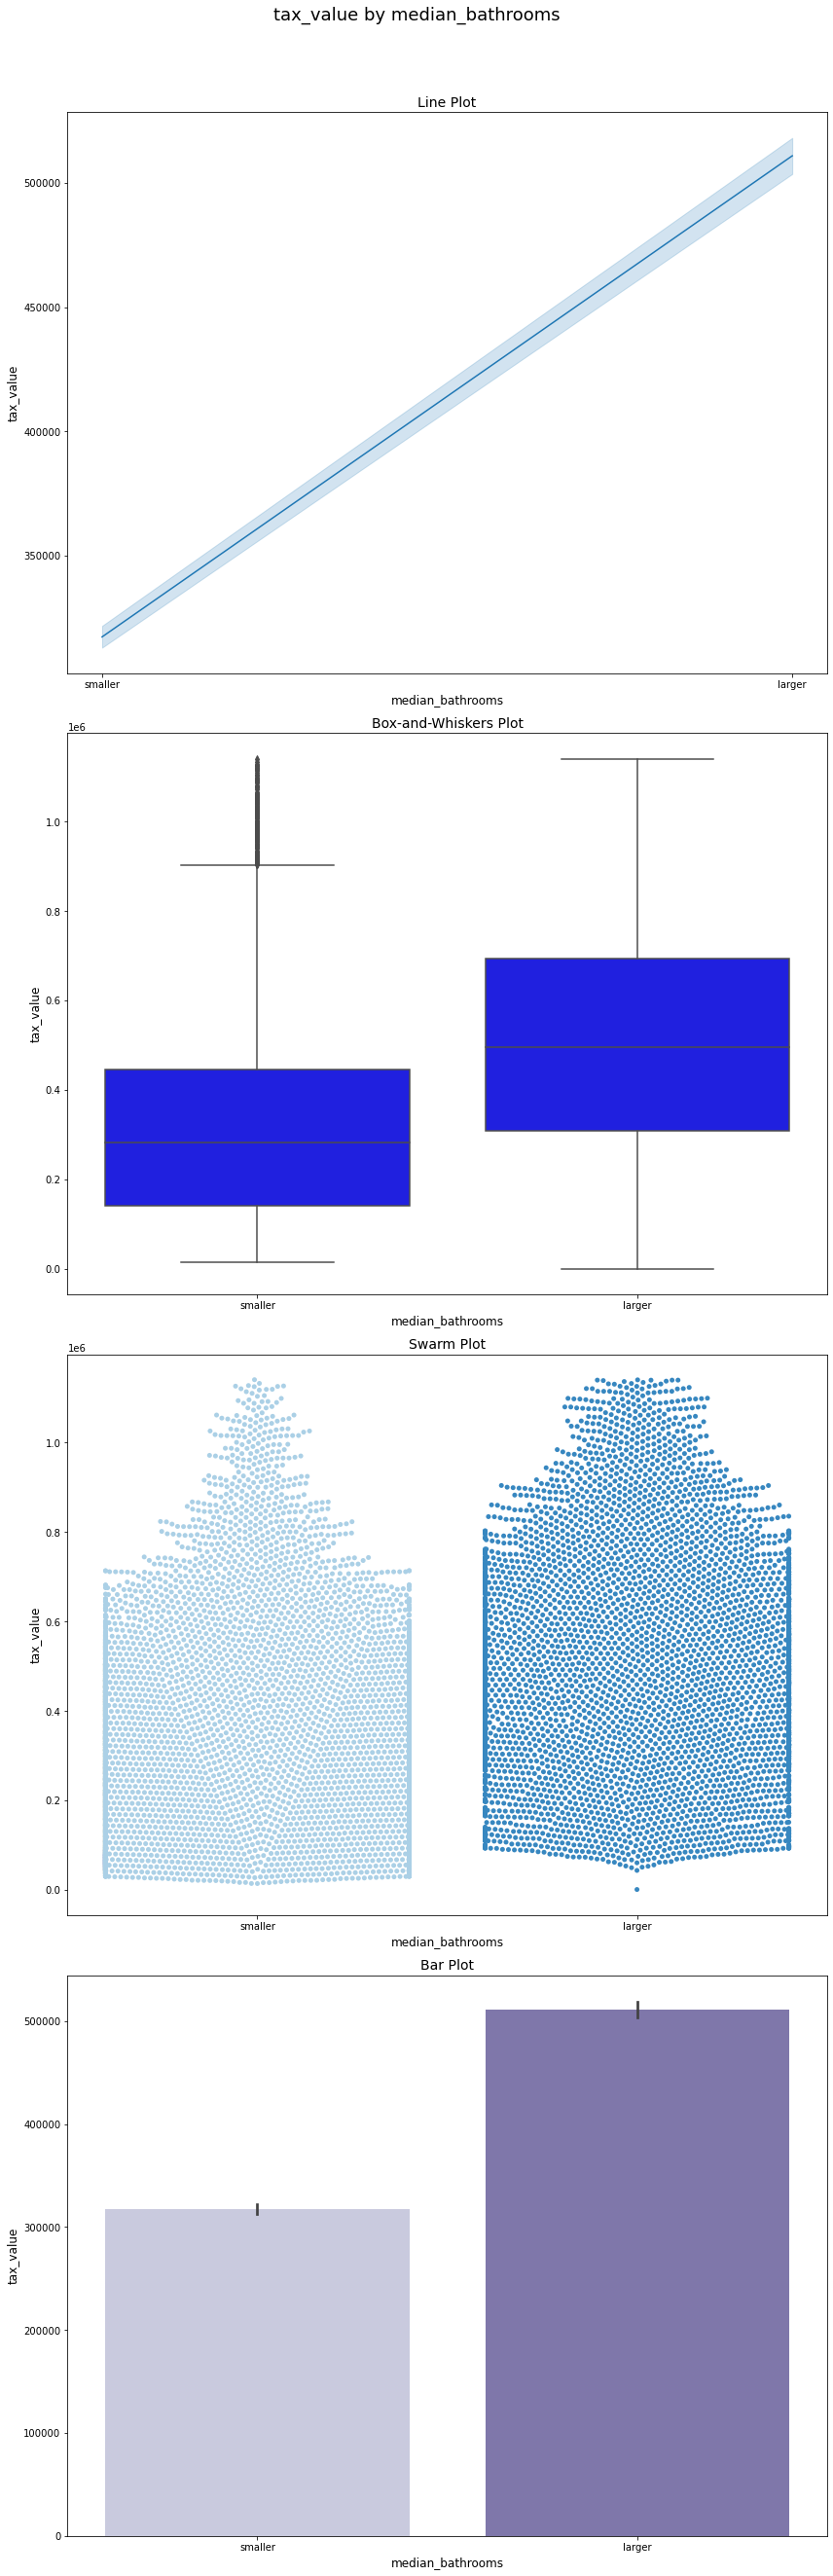

In [170]:
explore.plot_categorical_and_continuous_vars(categorical_vars, continuous_vars, train)

In [14]:
categorical_vars = ['median_area', 'median_bed', 'median_bathrooms']
continuous_vars = ['area']

In [15]:
#explore.plot_categorical_and_continuous_vars(categorical_vars, continuous_vars, train)

# Graph Takeaways

- Looks like heat map indicates area and bathrooms are more correlated 

- It looks like Area and bathrooms have more a role in increasing tax_value than bedrooms

- The larger the house, the larger the tax_value

- The more bathrooms, the larger the tax_value

- The more bedrooms, the larger the tax_value

- All features seem to be correlated, for example, the larger the area, the larger the house, the larger the bedrooms and bathrooms

- Using all features for modeling at once.

# Feature Engineering

In [16]:
train_s, validate_s, test_s = wrangle_zillow_modeling()

In [17]:
cols = list(train_s.columns)
cols

['area',
 'bedrooms',
 'bathrooms',
 'tax_value',
 'bedrooms_scaled',
 'bathrooms_scaled',
 'area_scaled']

In [18]:
X_train = train_s[['bedrooms_scaled', 'bathrooms_scaled', 'area_scaled']]
y_train = train_s['tax_value']

### Kbest

In [19]:
# parameters: f_regression stats test, give me 8 features
f_selector = SelectKBest(f_regression, k=1)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()
f_feature

['area_scaled']

In [20]:
# parameters: f_regression stats test, give me 8 features
f_selector = SelectKBest(f_regression, k=2)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()
f_feature

['bathrooms_scaled', 'area_scaled']

### RFE

In [21]:
# RFE time

# Make the thing(s)
lm = sklearn.linear_model.LinearRegression()
rfe = sklearn.feature_selection.RFE(lm, n_features_to_select=2)

# Fit the thing
rfe.fit(X_train, y_train)

# use the thing
rfe_columns = X_train.columns[rfe.support_].tolist()
rfe_columns

['bedrooms_scaled', 'area_scaled']

In [22]:
# RFE time

# Make the thing(s)
lm = sklearn.linear_model.LinearRegression()
rfe = sklearn.feature_selection.RFE(lm, n_features_to_select=1)

# Fit the thing
rfe.fit(X_train, y_train)

# use the thing
rfe_columns = X_train.columns[rfe.support_].tolist()
rfe_columns

['area_scaled']

In [23]:
def show_features_rankings(X_train, rfe):
    """
    Takes in a dataframe and a fit RFE object in order to output the rank of all features
    """
    # rfe here is reference rfe from cell 15
    var_ranks = rfe.ranking_
    var_names = X_train.columns.tolist()
    ranks = pd.DataFrame({'Var': var_names, 'Rank': var_ranks})
    ranks = ranks.sort_values(by="Rank", ascending=True)
    return ranks

In [24]:
def select_rfe(X, y, k):
    # make the thing
    lm = sklearn.linear_model.LinearRegression()
    rfe = sklearn.feature_selection.RFE(lm, n_features_to_select=k)

    # Fit the thing
    rfe.fit(X, y)
    
    # use the thing
    features_to_use = X.columns[rfe.support_].tolist()
    
    # we need to send show_feature_rankings a trained/fit RFE object
    all_rankings = show_features_rankings(X, rfe)
    
    return features_to_use, all_rankings

In [25]:
select_rfe(X_train, y_train, 1)

(['area_scaled'],
                 Var  Rank
 2       area_scaled     1
 0   bedrooms_scaled     2
 1  bathrooms_scaled     3)

In [26]:
select_rfe(X_train, y_train, 2)

(['bedrooms_scaled', 'area_scaled'],
                 Var  Rank
 0   bedrooms_scaled     1
 2       area_scaled     1
 1  bathrooms_scaled     2)

# Feature Engineering takeaways

- Kbest k=1 suggests area_scaled is best feature

- Kbest k=2 suggests area_scaled and bathroom_scaled are the top two

- RFE n=1 suggests area_scaled is best feature

- RFE n=2 suggests area_scaled and bedroom_scaled are the top two

# Exploration Take Away

- Going to run all features into model

- Going to run just area_scaled into model

- Going to run area_scaled and bathrooms_scaled

- Going to run area_scaled and bedrooms_scaled

# Modeling

In [27]:
train, validate, test = wrangle_zillow_modeling()

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13734 entries, 23415 to 7678
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              13734 non-null  float64
 1   bedrooms          13734 non-null  float64
 2   bathrooms         13734 non-null  float64
 3   tax_value         13734 non-null  float64
 4   bedrooms_scaled   13734 non-null  float64
 5   bathrooms_scaled  13734 non-null  float64
 6   area_scaled       13734 non-null  float64
dtypes: float64(7)
memory usage: 858.4 KB


### Using all features (metric_df1)

In [29]:
X_train = train[["bedrooms_scaled", "bathrooms_scaled", "area_scaled"]]
y_train = train["tax_value"]

X_validate = validate[["bedrooms_scaled", "bathrooms_scaled", "area_scaled"]]
y_validate = validate[["tax_value"]]

X_test = test[["bedrooms_scaled", "bathrooms_scaled", "area_scaled"]]
y_test= test["tax_value"]

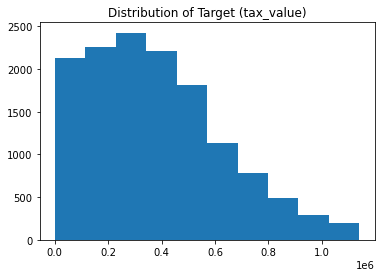

In [30]:
plt.hist(y_train)
plt.title('Distribution of Target (tax_value)')
plt.show()

In [31]:
y_train  = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

### Baseline 

In [32]:
def baseline(y_train, y_validate, metric_df):
    mean = y_train.tax_value.mean() # Train Mean
    y_train['tax_value_pred_mean'] = mean
    y_validate['tax_value_pred_mean'] = mean
    
    # make our first entry into the metric_df with median baseline
    metric_df = make_metric_df(y_validate.tax_value,
                           y_validate.tax_value_pred_mean,
                           'mean_baseline',
                          metric_df)
    return metric_df

In [33]:
# Mean
mean = y_train.tax_value.mean() # Train Mean
y_train['tax_value_pred_mean'] = mean
y_validate['tax_value_pred_mean'] = mean

In [34]:
# Median
median = y_train.tax_value.median() # Train Median
y_train['tax_value_pred_median'] = median
y_validate['tax_value_pred_median'] = median

In [35]:
y_train.head()

,tax_value,tax_value_pred_mean,tax_value_pred_median
23415,400834.0,381835.898136,344837.0
27422,530710.0,381835.898136,344837.0
22548,103502.0,381835.898136,344837.0
21163,394909.0,381835.898136,344837.0
3347,1009645.0,381835.898136,344837.0


In [36]:
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_mean) ** (1/2)

rmse_train, rmse_validate

(247293.79986406743, 252585.8230300088)

In [37]:
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_median) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_median) ** (1/2)

rmse_train, rmse_validate

(250046.27954538434, 254831.6909164786)

Looks like rmse_validate on mean was lower than median. So Mean will be our baseline

In [38]:
def make_metric_df(y, y_pred, model_name, metric_df):
    if metric_df.size ==0:
        metric_df = pd.DataFrame(data=[
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }])
        return metric_df
    else:
        return metric_df.append(
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }, ignore_index=True)

In [39]:
# create the metric_df as a blank dataframe
metric_df1 = pd.DataFrame()

In [40]:
# make our first entry into the metric_df with median baseline
metric_df1 = make_metric_df(y_validate.tax_value,
                           y_validate.tax_value_pred_mean,
                           'mean_baseline',
                          metric_df1)

In [41]:
# make our first entry into the metric_df with median baseline
metric_df1 = make_metric_df(y_validate.tax_value,
                           y_validate.tax_value_pred_median,
                           'median_baseline',
                          metric_df1)

In [42]:
metric_df1

,model,RMSE_validate,r^2_validate
0,mean_baseline,252585.823030,-2.220446e-16
1,median_baseline,254831.690916,-2.220446e-16


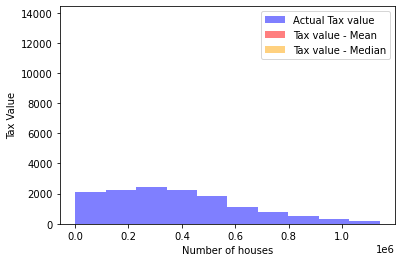

In [43]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.tax_value, color='blue', alpha=.5, label="Actual Tax value")
plt.hist(y_train.tax_value_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Tax value - Mean")
plt.hist(y_train.tax_value_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Tax value - Median")
plt.xlabel("Number of houses")
plt.ylabel("Tax Value")
plt.legend()
plt.show()

# Ordinary Least Squares

In [44]:
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train.tax_value)

LinearRegression(normalize=True)

In [45]:
y_train['tax_value_pred_lm'] = lm.predict(X_train)

In [46]:
# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm) ** (1/2)

# predict validate
y_validate['tax_value_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  219067.0744824471 
Validation/Out-of-Sample:  220237.90984895822


In [47]:
metric_df = pd.DataFrame()
metric_df1 = pd.DataFrame()

In [48]:
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.tax_value_pred_lm)}, ignore_index=True)

# LASSO + LARS

### Alpha 1

In [49]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train, y_train.tax_value)

# predict train
y_train['tax_value_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars) ** (1/2)

# predict validate
y_validate['tax_value_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  219067.25349001284 
Validation/Out-of-Sample:  220242.60063202502


In [50]:
metric_df1 = make_metric_df(y_validate.tax_value,
               y_validate.tax_value_pred_lars,
               'lasso_alpha_1',
               metric_df1)

### Alpha 2

In [51]:
# create the model object
lars = LassoLars(alpha=2)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train, y_train.tax_value)

# predict train
y_train['tax_value_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars) ** (1/2)

# predict validate
y_validate['tax_value_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  219067.7905118325 
Validation/Out-of-Sample:  220247.64667377737


In [52]:
metric_df1 = make_metric_df(y_validate.tax_value,
               y_validate.tax_value_pred_lars,
               'lasso_alpha_2',
               metric_df1)

### Alpha 3

In [53]:
# create the model object
lars = LassoLars(alpha=3)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train, y_train.tax_value)

# predict train
y_train['tax_value_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars) ** (1/2)

# predict validate
y_validate['tax_value_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  219068.68554527318 
Validation/Out-of-Sample:  220253.04794979803


In [54]:
metric_df1 = make_metric_df(y_validate.tax_value,
               y_validate.tax_value_pred_lars,
               'lasso_alpha_3',
               metric_df1)

### Alpha 4

In [55]:
# create the model object
lars = LassoLars(alpha=4)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train, y_train.tax_value)

# predict train
y_train['tax_value_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars) ** (1/2)

# predict validate
y_validate['tax_value_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  219069.93858594677 
Validation/Out-of-Sample:  220258.80443395348


In [56]:
metric_df1 = make_metric_df(y_validate.tax_value,
               y_validate.tax_value_pred_lars,
               'lasso_alpha_4',
               metric_df1)

In [57]:
metric_df1

,model,RMSE_validate,r^2_validate
0,lasso_alpha_1,220242.600632,0.239721
1,lasso_alpha_2,220247.646674,0.239687
2,lasso_alpha_3,220253.047950,0.239650
3,lasso_alpha_4,220258.804434,0.239611


# Tweedie

In [58]:
# create the model object
glm = TweedieRegressor(power=1, alpha=1)


# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.tax_value)

# predict train
y_train['tax_value_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_glm) ** (1/2)

# predict validate
y_validate['tax_value_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  219156.52241631295 
Validation/Out-of-Sample:  220158.45621307415


In [59]:
metric_df1 = make_metric_df(y_validate.tax_value,
               y_validate.tax_value_pred_glm,
               'glm_tweedie',
               metric_df1)

In [60]:
metric_df1

,model,RMSE_validate,r^2_validate
0,lasso_alpha_1,220242.600632,0.239721
1,lasso_alpha_2,220247.646674,0.239687
2,lasso_alpha_3,220253.047950,0.239650
3,lasso_alpha_4,220258.804434,0.239611
4,glm_tweedie,220158.456213,0.240302


# Polynomial

### Degree 2

In [61]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 =  pf.transform(X_test)

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['tax_value_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm2) ** (1/2)

# predict validate
y_validate['tax_value_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm2) ** 0.5

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  218743.23870053954 
Validation/Out-of-Sample:  219948.09821069572


In [62]:
metric_df1 = make_metric_df(y_validate.tax_value,
               y_validate.tax_value_pred_lm2,
               'poly_degree_2',
               metric_df1)

In [63]:
metric_df1

,model,RMSE_validate,r^2_validate
0,lasso_alpha_1,220242.600632,0.239721
1,lasso_alpha_2,220247.646674,0.239687
2,lasso_alpha_3,220253.047950,0.239650
3,lasso_alpha_4,220258.804434,0.239611
4,glm_tweedie,220158.456213,0.240302
5,poly_degree_2,219948.098211,0.241745


### degree 3

In [64]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 =  pf.transform(X_test)

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['tax_value_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm2) ** (1/2)

# predict validate
y_validate['tax_value_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm2) ** 0.5

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  218546.6454907384 
Validation/Out-of-Sample:  219788.33451039603


In [65]:
metric_df1 = make_metric_df(y_validate.tax_value,
               y_validate.tax_value_pred_lm2,
               'poly_degree_3',
               metric_df1)

In [66]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=4)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 =  pf.transform(X_test)

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['tax_value_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm2) ** (1/2)

# predict validate
y_validate['tax_value_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm2) ** 0.5

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  218258.809511737 
Validation/Out-of-Sample:  219743.59484413877


In [67]:
metric_df1 = make_metric_df(y_validate.tax_value,
               y_validate.tax_value_pred_lm2,
               'poly_degree_4',
               metric_df1)

In [68]:
metric_df1

,model,RMSE_validate,r^2_validate
0,lasso_alpha_1,220242.600632,0.239721
1,lasso_alpha_2,220247.646674,0.239687
2,lasso_alpha_3,220253.047950,0.239650
3,lasso_alpha_4,220258.804434,0.239611
4,glm_tweedie,220158.456213,0.240302
5,poly_degree_2,219948.098211,0.241745
6,poly_degree_3,219788.334510,0.242850
7,poly_degree_4,219743.594844,0.243141


### Using only area (metric_df2)

In [69]:
train, validate, test = wrangle_zillow_modeling()

In [70]:
X_train = train[["area_scaled"]]
y_train = train["tax_value"]

X_validate = validate[["area_scaled"]]
y_validate = validate["tax_value"]

X_test = test[["area_scaled"]]
y_test= test["tax_value"]

In [71]:
y_train  = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [72]:
metric_df2 = pd.DataFrame()

In [73]:
def ols(X_train, y_train, X_validate, y_validate, metric_df):
    lm = LinearRegression(normalize=True)
    lm.fit(X_train, y_train.tax_value)
    y_train['tax_value_pred_lm'] = lm.predict(X_train)
    # evaluate: rmse
    rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm) ** (1/2)

    # predict validate
    y_validate['tax_value_pred_lm'] = lm.predict(X_validate)

    # evaluate: rmse
    rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm) ** (1/2)
    
    metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.tax_value_pred_lm)}, ignore_index=True)
    
    return metric_df

In [74]:
metric_df2 = ols(X_train, y_train, X_validate, y_validate, metric_df2)

In [75]:
def lasso_lars(X_train, y_train, X_validate, y_validate, metric_df, alpha):
    # create the model object
    lars = LassoLars(alpha=alpha)
    
    # fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series!
    lars.fit(X_train, y_train.tax_value)
    
    # predict train
    y_train['tax_value_pred_lars'] = lars.predict(X_train)
    
    # evaluate: rmse
    rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars) ** (1/2)
    
    # predict validate
    y_validate['tax_value_pred_lars'] = lars.predict(X_validate)
    
    # evaluate: rmse
    rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars) ** (1/2)
    
    metric_df = make_metric_df(y_validate.tax_value,
               y_validate.tax_value_pred_lars,
               'lasso_alpha_'+str(alpha),
               metric_df)
    return metric_df

In [76]:
metric_df2 = lasso_lars(X_train, y_train, X_validate, y_validate, metric_df2, 1)

In [77]:
metric_df2

,RMSE_validate,model,r^2_validate
0,221523.635651,OLS Regressor,0.230919
1,221529.000867,lasso_alpha_1,0.230881


In [78]:
for i in range (2, 6):
    metric_df2 = lasso_lars(X_train, y_train, X_validate, y_validate, metric_df2, i)

In [79]:
metric_df2

,RMSE_validate,model,r^2_validate
0,221523.635651,OLS Regressor,0.230919
1,221529.000867,lasso_alpha_1,0.230881
2,221534.427694,lasso_alpha_2,0.230844
3,221539.916128,lasso_alpha_3,0.230805
4,221545.466164,lasso_alpha_4,0.230767
5,221551.077799,lasso_alpha_5,0.230728


In [80]:
def tweedie(X_train, y_train, X_validate, y_validate, metric_df, power, alpha):
    # create the model object
    glm = TweedieRegressor(power=power, alpha=alpha)
    
    
    # fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series! 
    glm.fit(X_train, y_train.tax_value)
    
    # predict train
    y_train['tax_value_pred_glm'] = glm.predict(X_train)
    
    # evaluate: rmse
    rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_glm) ** (1/2)
    
    # predict validate
    y_validate['tax_value_pred_glm'] = glm.predict(X_validate)
    
    # evaluate: rmse
    rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_glm) ** (1/2)
    
    metric_df = make_metric_df(y_validate.tax_value,
               y_validate.tax_value_pred_glm,
               'glm_power_'+str(power)+"_aplha_"+str(alpha),
               metric_df)
    return metric_df

In [81]:
for power in range (0, 5):
    for alpha in range(0, 5):
        metric_df2 = tweedie(X_train, y_train, X_validate, y_validate, metric_df2, power, alpha)

In [82]:
metric_df2

,RMSE_validate,model,r^2_validate
0,221523.635651,OLS Regressor,2.309186e-01
1,221529.000867,lasso_alpha_1,2.308813e-01
2,221534.427694,lasso_alpha_2,2.308435e-01
3,221539.916128,lasso_alpha_3,2.308054e-01
4,221545.466164,lasso_alpha_4,2.307667e-01
5,221551.077799,lasso_alpha_5,2.307277e-01
6,221523.635659,glm_power_0_aplha_0,2.309186e-01
7,250525.450188,glm_power_0_aplha_1,1.625208e-02
8,251528.033897,glm_power_0_aplha_2,8.360383e-03
9,251874.299488,glm_power_0_aplha_3,5.627485e-03


In [83]:
def poly(X_train, y_train, X_validate, y_validate, metric_df, degree):
    # make the polynomial features to get a new set of features
    pf = PolynomialFeatures(degree=degree)
    
    # fit and transform X_train_scaled
    X_train_degree2 = pf.fit_transform(X_train)
    
    # transform X_validate_scaled & X_test_scaled
    X_validate_degree2 = pf.transform(X_validate)
    X_test_degree2 =  pf.transform(X_test)
    
    # create the model object
    lm2 = LinearRegression(normalize=True)
    
    # fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series! 
    lm2.fit(X_train_degree2, y_train.tax_value)
    
    # predict train
    y_train['tax_value_pred_lm2'] = lm2.predict(X_train_degree2)
    
    # evaluate: rmse
    rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm2) ** (1/2)
    
    # predict validate
    y_validate['tax_value_pred_lm2'] = lm2.predict(X_validate_degree2)
    
    # evaluate: rmse
    rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm2) ** 0.5
    metric_df = make_metric_df(y_validate.tax_value,
                   y_validate.tax_value_pred_lm2,
                   'poly_degree_'+str(degree),
                   metric_df)
    return metric_df


In [84]:
for degree in range(2, 6):
    metric_df2 = poly(X_train, y_train, X_validate, y_validate, metric_df2, degree)

In [85]:
metric_df2

,RMSE_validate,model,r^2_validate
0,221523.635651,OLS Regressor,2.309186e-01
1,221529.000867,lasso_alpha_1,2.308813e-01
2,221534.427694,lasso_alpha_2,2.308435e-01
3,221539.916128,lasso_alpha_3,2.308054e-01
4,221545.466164,lasso_alpha_4,2.307667e-01
5,221551.077799,lasso_alpha_5,2.307277e-01
6,221523.635659,glm_power_0_aplha_0,2.309186e-01
7,250525.450188,glm_power_0_aplha_1,1.625208e-02
8,251528.033897,glm_power_0_aplha_2,8.360383e-03
9,251874.299488,glm_power_0_aplha_3,5.627485e-03


In [86]:
def metric(X_train, y_train, X_validate, y_validate, metric_df):
    
    #baseline
    
    metric_df = baseline(y_train, y_validate, metric_df)
    
    #ols
    metric_df = ols(X_train, y_train, X_validate, y_validate, metric_df)
    
    #lasso-lars
    for i in range (2, 6):
        metric_df = lasso_lars(X_train, y_train, X_validate, y_validate, metric_df, i)
    
    #tweedie
    for power in range (0, 5):
        for alpha in range(0, 5):
            metric_df = tweedie(X_train, y_train, X_validate, y_validate, metric_df, power, alpha)
    
    #Poly
    for degree in range(2, 6):
        metric_df = poly(X_train, y_train, X_validate, y_validate, metric_df, degree)
    
    return metric_df

In [124]:
X_train = train[["bedrooms_scaled", "bathrooms_scaled", "area_scaled"]]
y_train = train["tax_value"]

X_validate = validate[["bedrooms_scaled", "bathrooms_scaled", "area_scaled"]]
y_validate = validate[["tax_value"]]

X_test = test[["bedrooms_scaled", "bathrooms_scaled", "area_scaled"]]
y_test= test["tax_value"]

y_train  = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

metric_df_all_features = pd.DataFrame()

metric_df_all_features = metric(X_train, y_train, X_validate, y_validate, metric_df_all_features)

metric_df_all_features.sort_values("RMSE_validate")

# PLot the R for that model

# Look at rmse, for train/validate, look for drop off


,model,RMSE_validate,r^2_validate
33,poly_degree_4,221012.810256,2.219353e-01
34,poly_degree_5,221159.143313,2.208836e-01
32,poly_degree_3,221170.192638,2.208141e-01
31,poly_degree_2,221312.672497,2.198345e-01
5,lasso_alpha_5,221517.516867,2.183849e-01
4,lasso_alpha_4,221521.230109,2.183577e-01
3,lasso_alpha_3,221525.314369,2.183279e-01
2,lasso_alpha_2,221529.769629,2.182955e-01
1,OLS Regressor,221539.793050,2.182228e-01
6,glm_power_0_aplha_0,221539.793120,2.182228e-01


In [121]:
X_train = train[["area_scaled"]]
y_train = train["tax_value"]

X_validate = validate[["area_scaled"]]
y_validate = validate[["tax_value"]]

X_test = test[["area_scaled"]]
y_test= test["tax_value"]

y_train  = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

metric_df_area = pd.DataFrame()

metric_df_area = metric(X_train, y_train, X_validate, y_validate, metric_df_area)

metric_df_area.sort_values("RMSE_validate")

,model,RMSE_validate,r^2_validate
31,poly_degree_2,222584.525274,2.109140e-01
32,poly_degree_3,222634.552796,2.105550e-01
6,glm_power_0_aplha_0,222635.674906,2.105435e-01
1,OLS Regressor,222635.674925,2.105435e-01
2,lasso_alpha_2,222636.988988,2.105348e-01
3,lasso_alpha_3,222637.738456,2.105299e-01
4,lasso_alpha_4,222638.549550,2.105244e-01
5,lasso_alpha_5,222639.422267,2.105186e-01
33,poly_degree_4,222653.995712,2.104147e-01
34,poly_degree_5,222682.274617,2.102070e-01


In [89]:
X_train = train[["area_scaled", "bedrooms_scaled"]]
y_train = train["tax_value"]

X_validate = validate[["area_scaled", "bedrooms_scaled"]]
y_validate = validate[["tax_value"]]

X_test = test[["area_scaled", "bedrooms_scaled"]]
y_test= test["tax_value"]

y_train  = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

metric_df_area_bed = pd.DataFrame()

metric_df_area_bed = metric(X_train, y_train, X_validate, y_validate, metric_df_area_bed)

metric_df_area_bed.sort_values("RMSE_validate").head(10)

,model,RMSE_validate,r^2_validate
32,poly_degree_3,220360.365671,0.238898
34,poly_degree_5,220377.844269,0.238768
31,poly_degree_2,220381.469183,0.238763
33,poly_degree_4,220390.141694,0.238688
1,OLS Regressor,220482.064049,0.238067
6,glm_power_0_aplha_0,220482.064873,0.238067
2,lasso_alpha_2,220494.490787,0.237982
3,lasso_alpha_3,220501.176388,0.237937
4,lasso_alpha_4,220508.176773,0.237889
5,lasso_alpha_5,220515.491912,0.237839


In [90]:
metric_df_area_bed[metric_df_area_bed["r^2_validate"] > .20].sort_values("RMSE_validate")

,model,RMSE_validate,r^2_validate
32,poly_degree_3,220360.365671,0.238898
34,poly_degree_5,220377.844269,0.238768
31,poly_degree_2,220381.469183,0.238763
33,poly_degree_4,220390.141694,0.238688
1,OLS Regressor,220482.064049,0.238067
6,glm_power_0_aplha_0,220482.064873,0.238067
2,lasso_alpha_2,220494.490787,0.237982
3,lasso_alpha_3,220501.176388,0.237937
4,lasso_alpha_4,220508.176773,0.237889
5,lasso_alpha_5,220515.491912,0.237839


In [91]:
X_train = train[["area_scaled", "bathrooms_scaled"]]
y_train = train["tax_value"]

X_validate = validate[["area_scaled", "bathrooms_scaled"]]
y_validate = validate[["tax_value"]]

X_test = test[["area_scaled", "bathrooms_scaled"]]
y_test= test["tax_value"]

y_train  = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

metric_df_area_bath = pd.DataFrame()

metric_df_area_bath = metric(X_train, y_train, X_validate, y_validate, metric_df_area_bath)

metric_df_area_bath.sort_values("RMSE_validate")

,model,RMSE_validate,r^2_validate
33,poly_degree_4,220868.444643,2.354621e-01
32,poly_degree_3,220895.546168,2.352801e-01
31,poly_degree_2,220997.801908,2.345554e-01
16,glm_power_2_aplha_0,221007.888669,2.345143e-01
34,poly_degree_5,221035.138047,2.342817e-01
11,glm_power_1_aplha_0,221073.728873,2.340368e-01
12,glm_power_1_aplha_1,221074.009129,2.340348e-01
13,glm_power_1_aplha_2,221074.289616,2.340329e-01
14,glm_power_1_aplha_3,221074.570333,2.340309e-01
15,glm_power_1_aplha_4,221074.851280,2.340290e-01


# all features - glm_power_2_aplha_0

In [92]:
metric_df_all_features[metric_df_all_features["r^2_validate"] > .20].sort_values("RMSE_validate")

,model,RMSE_validate,r^2_validate
33,poly_degree_4,219743.594844,0.243141
32,poly_degree_3,219788.334510,0.242850
34,poly_degree_5,219932.544974,0.241824
31,poly_degree_2,219948.098211,0.241745
16,glm_power_2_aplha_0,220088.251076,0.240824
11,glm_power_1_aplha_0,220158.207724,0.240304
12,glm_power_1_aplha_1,220158.456213,0.240302
13,glm_power_1_aplha_2,220158.705101,0.240301
14,glm_power_1_aplha_3,220158.954388,0.240299
15,glm_power_1_aplha_4,220159.204073,0.240297


# Area - glm_power_2_aplha_0

In [93]:
metric_df_area[metric_df_area["r^2_validate"] > .20].sort_values("RMSE_validate")

,model,RMSE_validate,r^2_validate
34,poly_degree_5,221182.942810,0.233261
32,poly_degree_3,221196.289796,0.233176
33,poly_degree_4,221212.399476,0.233063
31,poly_degree_2,221230.283718,0.232948
16,glm_power_2_aplha_0,221291.641634,0.232565
11,glm_power_1_aplha_0,221358.862072,0.232055
12,glm_power_1_aplha_1,221359.075785,0.232053
13,glm_power_1_aplha_2,221359.289690,0.232052
14,glm_power_1_aplha_3,221359.503811,0.232050
15,glm_power_1_aplha_4,221359.718137,0.232049


# Area/Bed - OLS Regressor

In [94]:
metric_df_area_bed[metric_df_area_bed["r^2_validate"] > .20].sort_values("RMSE_validate")

,model,RMSE_validate,r^2_validate
32,poly_degree_3,220360.365671,0.238898
34,poly_degree_5,220377.844269,0.238768
31,poly_degree_2,220381.469183,0.238763
33,poly_degree_4,220390.141694,0.238688
1,OLS Regressor,220482.064049,0.238067
6,glm_power_0_aplha_0,220482.064873,0.238067
2,lasso_alpha_2,220494.490787,0.237982
3,lasso_alpha_3,220501.176388,0.237937
4,lasso_alpha_4,220508.176773,0.237889
5,lasso_alpha_5,220515.491912,0.237839


# Area/bath - glm_power_2_aplha_0

In [95]:
metric_df_area_bath[metric_df_area_bath["r^2_validate"] > .20].sort_values("RMSE_validate")

,model,RMSE_validate,r^2_validate
33,poly_degree_4,220868.444643,0.235462
32,poly_degree_3,220895.546168,0.235280
31,poly_degree_2,220997.801908,0.234555
16,glm_power_2_aplha_0,221007.888669,0.234514
34,poly_degree_5,221035.138047,0.234282
11,glm_power_1_aplha_0,221073.728873,0.234037
12,glm_power_1_aplha_1,221074.009129,0.234035
13,glm_power_1_aplha_2,221074.289616,0.234033
14,glm_power_1_aplha_3,221074.570333,0.234031
15,glm_power_1_aplha_4,221074.851280,0.234029


In [96]:
area_bath = 221007
area_bed = 220482 # OLS Regressor
area = 221291
a_features = 220088 # glm_power_2_aplha_0

In [97]:
area_bed < a_features

False

In [98]:
X_train = train[["area_scaled", "bedrooms_scaled"]]
y_train = train["tax_value"]

X_validate = validate[["area_scaled", "bedrooms_scaled"]]
y_validate = validate[["tax_value"]]

y_train  = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train.tax_value)
y_train['tax_value_pred_lm'] = lm.predict(X_train)
# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm) ** (1/2)

# predict validate
y_validate['tax_value_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm) ** (1/2)

print("RMSE for lm\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for lm
Training/In-Sample:  219531.20615322224 
Validation/Out-of-Sample:  220482.0640487822


In [99]:
rmse_validate - rmse_train

950.8578955599514

In [100]:
X_train = train[["bedrooms_scaled", "bathrooms_scaled", "area_scaled"]]
y_train = train["tax_value"]

X_validate = validate[["bedrooms_scaled", "bathrooms_scaled", "area_scaled"]]
y_validate = validate[["tax_value"]]

X_test = test[["bedrooms_scaled", "bathrooms_scaled", "area_scaled"]]
y_test= test["tax_value"]

In [101]:
y_train  = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)


glm = TweedieRegressor(power=2, alpha=0)
    
    
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.tax_value)

# predict train
y_train['tax_value_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_glm) ** (1/2)

# predict validate
y_validate['tax_value_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_glm) ** (1/2)

print("RMSE for glm\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for glm
Training/In-Sample:  219264.6456277737 
Validation/Out-of-Sample:  220088.25107583244


In [102]:
rmse_validate - rmse_train

823.6054480587482

In [103]:
train, validate, test = wrangle_zillow_second_modeling()

In [104]:
train.head()

,area,bedrooms,bathrooms,tax_value,has_pool,year,bedrooms_scaled,bathrooms_scaled,area_scaled,has_pool_scaled,year_scaled
21748,2300.0,4.0,2.0,440420.0,0.0,1968.0,0.666667,0.333333,0.580729,0.0,0.547170
11733,1146.0,2.0,1.0,353000.0,0.0,1929.0,0.000000,0.000000,0.205078,0.0,0.179245
13684,1429.0,2.0,2.0,600515.0,0.0,1938.0,0.000000,0.333333,0.297201,0.0,0.264151
2829,1216.0,2.0,2.0,228120.0,0.0,1951.0,0.000000,0.333333,0.227865,0.0,0.386792
17299,2572.0,4.0,3.0,557044.0,0.0,2000.0,0.666667,0.666667,0.669271,0.0,0.849057


In [105]:
X_train = train[["area_scaled", "bathrooms_scaled", "bedrooms_scaled", "has_pool_scaled", "year_scaled"]]
y_train = train["tax_value"]

X_validate = validate[["area_scaled", "bathrooms_scaled", "bedrooms_scaled", "has_pool_scaled", "year_scaled"]]
y_validate = validate[["tax_value"]]

X_test = test[["area_scaled", "bathrooms_scaled", "bedrooms_scaled", "has_pool_scaled", "year_scaled"]]
y_test= test["tax_value"]

y_train  = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

metric_df_second = pd.DataFrame()

metric_df_second = metric(X_train, y_train, X_validate, y_validate, metric_df_second)

In [108]:
metric_df_second["r^2_validate"] = round(metric_df_second["r^2_validate"], 3)

In [109]:
metric_df_second.sort_values("RMSE_validate")

,model,RMSE_validate,r^2_validate
33,poly_degree_4,220007.368193,0.229
34,poly_degree_5,220074.083968,0.229
32,poly_degree_3,220090.079136,0.228
31,poly_degree_2,220478.456747,0.226
5,lasso_alpha_5,221309.745601,0.220
4,lasso_alpha_4,221316.592176,0.220
3,lasso_alpha_3,221323.879505,0.220
2,lasso_alpha_2,221331.607543,0.220
1,OLS Regressor,221348.385563,0.220
6,glm_power_0_aplha_0,221348.385618,0.220


# Test

In [197]:
train, validate, test = wrangle_zillow_modeling()

In [198]:
X_train = train[["bedrooms_scaled", "bathrooms_scaled", "area_scaled"]]
y_train = train["tax_value"]

X_validate = validate[["bedrooms_scaled", "bathrooms_scaled", "area_scaled"]]
y_validate = validate[["tax_value"]]

X_test = test[["bedrooms_scaled", "bathrooms_scaled", "area_scaled"]]
y_test= test["tax_value"]

In [199]:
y_train  = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

In [200]:
y_test  = pd.DataFrame(y_test)
y_validate = pd.DataFrame(y_validate)


glm = TweedieRegressor(power=2, alpha=0)
    
    
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.tax_value)

# predict test
y_test['tax_value_pred_glm'] = glm.predict(X_test)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.tax_value_pred_glm) ** (1/2)

# predict validate
y_validate['tax_value_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_glm) ** (1/2)

print("RMSE for glm\nTest/Out-of-Sample: ", round(rmse_test))



RMSE for glm
Test/Out-of-Sample:  223057


In [201]:
explained_variance_score(y_test[['tax_value']], y_test['tax_value_pred_glm'])

0.1919966762393751

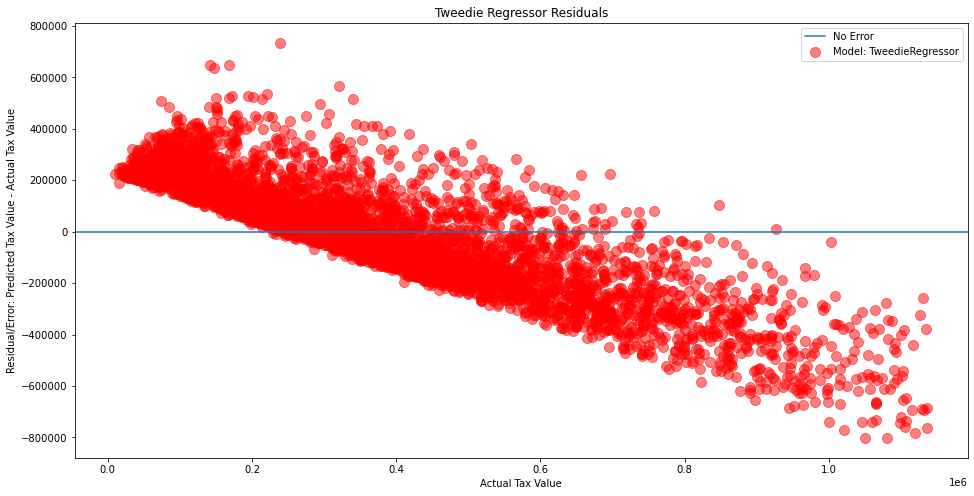

In [212]:
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_test.tax_value, (y_test.tax_value_pred_glm-y_test.tax_value), 
            alpha=.5, color="red", s=100, label="Model: TweedieRegressor")

plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Residual/Error: Predicted Tax Value - Actual Tax Value")
plt.title("Tweedie Regressor Residuals")
plt.show()

# Tax Counties

In [213]:
def get_db_url(url):
    url = f'mysql+pymysql://{user}:{password}@{host}/{url}'
    return url

In [228]:
sql_query = """
            
    SELECT calculatedfinishedsquarefeet, bedroomcnt, bathroomcnt, taxvaluedollarcnt, fips, taxamount
    FROM properties_2017
    LEFT JOIN predictions_2017
	    on properties_2017.parcelid = predictions_2017.parcelid
    WHERE (properties_2017.propertylandusetypeid = 261) and (transactiondate between "2017-05-01" and "2017-08-31");"""

    
df = pd.read_sql(sql_query, get_db_url('zillow'))


# renaming column names to one's I like better
df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                              'bathroomcnt':'bathrooms', 
                              'calculatedfinishedsquarefeet':'area',
                              'taxvaluedollarcnt':'tax_value',
                             'taxamount':'tax_amount',})

In [229]:
df.head()

,area,bedrooms,bathrooms,tax_value,fips,tax_amount
0,1316.0,3.0,2.0,205123.0,6037.0,2627.48
1,1458.0,3.0,2.0,136104.0,6037.0,2319.90
2,1421.0,2.0,1.0,35606.0,6037.0,543.69
3,2541.0,4.0,3.0,880456.0,6059.0,9819.72
4,1491.0,3.0,2.0,107110.0,6037.0,1399.27


In [219]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [230]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.dropna() # Decided to remove all nulls instead of imputing because of lack of domain knowledge
# removing outliers
df = remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'area', 'tax_value'])

In [231]:
len(df)

24525

In [232]:
df["county_name"] = df["fips"].map({6037: "Los Angeles", 6059: "Orange", 6111: "Ventura"})

In [233]:
# adding column 'tax_rate' which is the tax amount divided by the tax value
df['tax_rate'] = round(((df['tax_amount'] / df['tax_value'])* 100),2)
print(df.groupby('county_name').tax_rate.mean())

county_name
Los Angeles    1.427487
Orange         1.216264
Ventura        1.188152
Name: tax_rate, dtype: float64


In [234]:
df.county_name.value_counts()

Los Angeles    15685
Orange          6659
Ventura         2181
Name: county_name, dtype: int64

In [223]:
df.head()

,area,bedrooms,bathrooms,tax_value,fips,county_name
0,1316.0,3.0,2.0,205123.0,6037.0,Los Angeles
1,1458.0,3.0,2.0,136104.0,6037.0,Los Angeles
2,1421.0,2.0,1.0,35606.0,6037.0,Los Angeles
3,2541.0,4.0,3.0,880456.0,6059.0,Orange
4,1491.0,3.0,2.0,107110.0,6037.0,Los Angeles


In [226]:
df.groupby('county_name').mean()

,area,bedrooms,bathrooms,tax_value,fips
county_name,,,,,
Los Angeles,1625.899082,3.122211,2.018042,343724.570126,6037.0
Orange,1886.180057,3.378435,2.316564,451382.435501,6059.0
Ventura,1891.624484,3.481889,2.303301,434571.373223,6111.0


Text(0.5, 1.0, 'Distributions of Tax Rates by County')

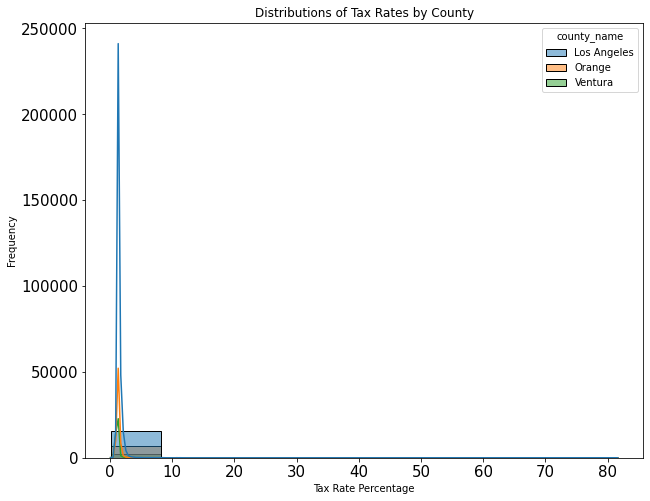

In [245]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='tax_rate', kde=True, hue='county_name', bins=10)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Tax Rate Percentage')
plt.ylabel('Frequency')
plt.title('Distributions of Tax Rates by County')

(0.75, 2.0)

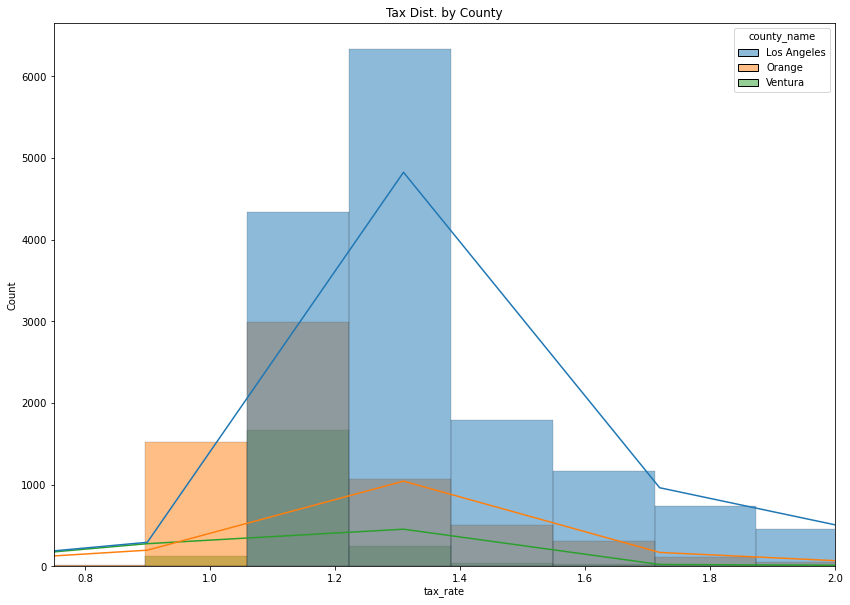

In [247]:

# plotting the tax rate by county
plt.figure(figsize=(14,10))
sns.histplot(data=df, x="tax_rate", hue="county_name",kde = True, bins = 500).set(title='Tax Dist. by County')

plt.xlim(.75, 2)